# Task 1

Importing necessary libraies 

In [16]:
colab = True
if colab:
    # Mount drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # Set path to working directory
    import sys
    sys.path.append('/content/gdrive/My Drive/Cse445/HousingPrice/')
    %cd /content/gdrive/My\ Drive/Cse445/HousingPrice/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Cse445/HousingPrice


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read train and test data
train = pd.read_csv('/content/gdrive/My Drive/Cse445/HousingPrice/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Cse445/HousingPrice/test.csv')

test_ids = test['Id']

## Part a

**Missing data (Null Value) and Categorical data Handle**

In [18]:
drop_candidates = []
for label in train.columns:
    if train[label].isnull().sum() >= 219:
        drop_candidates.append(label)
        print(label)
        

# Drop the columns
train = train.drop(columns=drop_candidates)
drop_candidates.append('Id')
test = test.drop(columns=drop_candidates)

LotFrontage
Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [19]:
# Fill NAs
for label in train.columns:
    if (train[label].dtype == "float64" or train[label].dtype == "int64"):
        train[label].fillna(train[label].mean(), inplace= True)
        
        if (label != 'SalePrice' and label != 'Id'):
            test[label].fillna(test[label].mean(), inplace= True)
    else:
        train[label] = train[label].fillna('NA')
        test[label] = test[label].fillna('NA')

## Part b

**Finding correlation matrix**

In [20]:
# Encode labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelsWhichRequireEncoding = ['MSSubClass','MSZoning','Street', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for label in labelsWhichRequireEncoding:
    train[label] = le.fit_transform(train[label].values)
    test[label] = le.fit_transform(test[label].values)

### Data Size and Shape

In [21]:
print("Training data size (rows x columns):", train.size)
print("Test data size (rows x columns):", test.size)
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)

Training data size (rows x columns): 109500
Test data size (rows x columns): 106507
Training data shape: (1460, 75)
Test data shape: (1459, 73)


### Number of Attributes

In [22]:
print("Number of attributes (excluding ID):", train.columns.size - 1)

Number of attributes (excluding ID): 74


### Correlation Matrix

In [23]:
corrmat = train.corr()
print(corrmat)

                     Id  MSSubClass  ...  SaleCondition  SalePrice
Id             1.000000    0.018745  ...      -0.005806  -0.021917
MSSubClass     0.018745    1.000000  ...      -0.033097  -0.054751
MSZoning      -0.006096    0.037785  ...       0.009494  -0.166872
LotArea       -0.033226   -0.132505  ...       0.034169   0.263843
Street         0.008916   -0.025737  ...       0.006064   0.041036
...                 ...         ...  ...            ...        ...
MoSold         0.021172    0.007052  ...       0.013320   0.046432
YrSold         0.000712   -0.022100  ...       0.003880  -0.028923
SaleType       0.019773    0.020195  ...       0.184067  -0.054911
SaleCondition -0.005806   -0.033097  ...       1.000000   0.213092
SalePrice     -0.021917   -0.054751  ...       0.213092   1.000000

[75 rows x 75 columns]


Here's the visualization of the correlation matrix:

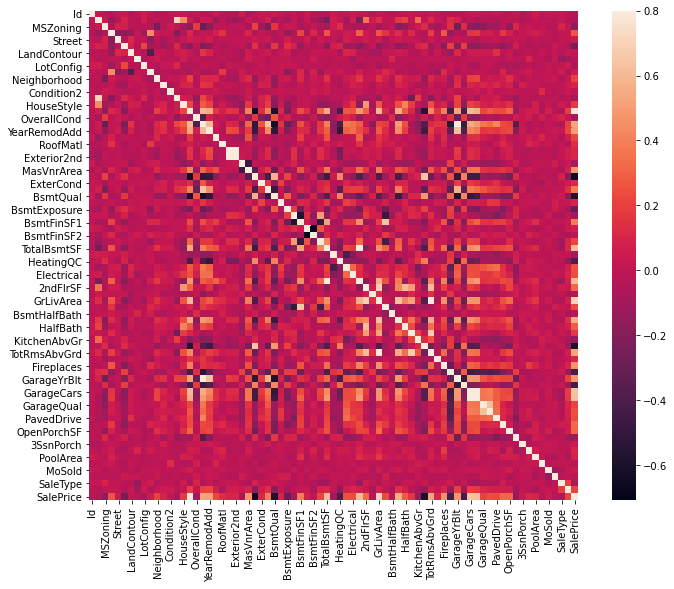

In [24]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Part c
Perform proper feature scaling to transform feature columns and target variable

In [25]:
# Split into X and Y
X = train.iloc[:, 1:-1].values
Y = train.iloc[:, -1].values

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=44, shuffle=True)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
test = sc.fit_transform(test)

# Task 2


## Part a

**Simple Linear Regression with Regularization**

In [26]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)

print("Simple Linear Regression (L1 + L2) score:", regr.score(X_test, Y_test))

Simple Linear Regression (L1 + L2) score: 0.8364044649280067


## Part b

**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=2, max_depth=2)
decision_tree = decision_tree.fit(X_train, Y_train)

print("Decision Tree with max depth restriction score:", decision_tree.score(X_test, Y_test))

decision_tree = DecisionTreeRegressor(random_state=2)
decision_tree = decision_tree.fit(X_train, Y_train)

print("Decision Tree without max depth restriction score:", decision_tree.score(X_test, Y_test))

Decision Tree with max depth restriction score: 0.5624024408855082
Decision Tree without max depth restriction score: 0.7253745384095776


## Part c

**Random Forest**

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=50, random_state=0)
rfc.fit(X_train, Y_train)

print("Random forest (50 estimators) score:", rfc.score(X_test, Y_test))

rfc = RandomForestRegressor(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)

print("Random forest (100 estimators) score:", rfc.score(X_test, Y_test))

rfc = RandomForestRegressor(n_estimators=150, random_state=0)
rfc.fit(X_train, Y_train)

print("Random forest (150 estimators) score:", rfc.score(X_test, Y_test))

rfc = RandomForestRegressor(n_estimators=200, random_state=0)
rfc.fit(X_train, Y_train)

print("Random forest (200 estimators) score:", rfc.score(X_test, Y_test))

Random forest (50 estimators) score: 0.8141398949608062
Random forest (100 estimators) score: 0.8232626162026526
Random forest (150 estimators) score: 0.8251756044581694
Random forest (200 estimators) score: 0.8256981179551016


# Task 3

**Perform PCA and then apply decision tree algorithm Comparing the result**

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 73)

decision_tree = DecisionTreeRegressor(random_state=2)
decision_tree = decision_tree.fit(pca.fit_transform(X_train), Y_train)

print("Decision Tree with max depth restriction score:", decision_tree.score(pca.transform(X_test), Y_test))

Decision Tree with max depth restriction score: 0.7357016335112224


**No, performing PCA and applying Decision Tree algorithm doesn't produce better result than that of the tasks performed in 1(a). However, performing PCA does improve the result of Decision Tree algorithm itself.**

# Task 4

## Generating CSV for Submitting to Kaggle

In [30]:
predictions = regr.predict(test)
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions})

filename = 'HousePricePredictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: HousePricePredictions.csv
